In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c classify-leaves
!unzip /content/classify-leaves.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/images/5500.jpg  
  inflating: /content/images/5501.jpg  
  inflating: /content/images/5502.jpg  
  inflating: /content/images/5503.jpg  
  inflating: /content/images/5504.jpg  
  inflating: /content/images/5505.jpg  
  inflating: /content/images/5506.jpg  
  inflating: /content/images/5507.jpg  
  inflating: /content/images/5508.jpg  
  inflating: /content/images/5509.jpg  
  inflating: /content/images/551.jpg  
  inflating: /content/images/5510.jpg  
  inflating: /content/images/5511.jpg  
  inflating: /content/images/5512.jpg  
  inflating: /content/images/5513.jpg  
  inflating: /content/images/5514.jpg  
  inflating: /content/images/5515.jpg  
  inflating: /content/images/5516.jpg  
  inflating: /content/images/5517.jpg  
  inflating: /content/images/5518.jpg  
  inflating: /content/images/5519.jpg  
  inflating: /content/images/552.jpg  
  inflating: /content/images/5520.jpg  
  inflating: /content/images/55

In [ ]:
!pip install d2l
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.6 MB/s eta 0:00:00
  Created wheel for pandas: filename=pandas-1.2.4-cp310-cp310-linux_x86_64.whl size=34330392 sha256=efa770cae11509fc0561e67b3d6ef743acbf97bb4f

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires pandas>=1.3.0, but you have pandas 1.2.4 which is incompatible.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.7.2 which is incompatible.
mizani 0.8.1 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
plotnine 0.10.1 requires pandas>=1.3.5, but you have pandas 1.2.4 w

In [ ]:
import torch
import torchvision
import os
from torch import nn
from d2l import torch as d2l

In [ ]:
# data preprocess
import pandas as pd
import numpy as np
data = pd.read_csv("/content/train.csv")
data['label_id'] = pd.factorize(data['label'])[0]
# print(data["label"].nunique()) # num of class: 176
random_seed = 42
np.random.seed(random_seed)

train_df = data.sample(frac=0.8, random_state=random_seed)
test_df = data.drop(train_df.index)

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
# import transforms as T

class MyDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = data
    # self.data["label_id"] = pd.factorize(self.data['label'])[0]
    self.transform = transform
    # self.mean = [0, 0, 0]
    # self.std = [0, 0, 0]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    img_path = "/content/" + self.data.iloc[idx, 0]
    label = self.data["label_id"].values[idx]
    # iloc[idx, 1] #todo
    image = Image.open(img_path).convert("RGB")
    # image_tensor = torchvision.transforms.ToTensor()(image)
    # for i in range(3):
    #   self.mean[i] += torch.mean(image_tensor[i])
    #   self.std[i] += torch.std(image_tensor[i])
    if self.transform is not None:
      image = self.transform(image)

    return image, label

  def set_transform(self, transform):
    self.transform = transform

def get_transform(train):
    transforms = []
    transforms.append(torchvision.transforms.PILToTensor())
    transforms.append(torchvision.transforms.ConvertImageDtype(torch.float))
    if train:
        transforms.append(torchvision.transforms.RandomHorizontalFlip(0.5))
    return torchvision.transforms.Compose(transforms)

In [ ]:
train_dataset = MyDataset(train_df, transform=get_transform(True))
test_dataset = MyDataset(test_df, transform=get_transform(False))

In [ ]:
pretrained_net = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


In [ ]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 176)
nn.init.xavier_uniform_(finetune_net.fc.weight)

Parameter containing:
tensor([[ 0.0644, -0.0794, -0.0257,  ..., -0.0263, -0.0723,  0.0698],
        [ 0.0668, -0.0375,  0.0442,  ...,  0.0637,  0.0807, -0.0836],
        [ 0.0700, -0.0317, -0.0399,  ..., -0.0524, -0.0269, -0.0649],
        ...,
        [-0.0858,  0.0098, -0.0130,  ...,  0.0880, -0.0690, -0.0131],
        [ 0.0464, -0.0660,  0.0051,  ...,  0.0849,  0.0710,  0.0856],
        [ 0.0823, -0.0068,  0.0249,  ..., -0.0196, -0.0626, -0.0376]],
       requires_grad=True)

In [ ]:
def train_batch_ch13(net, X, y, loss, trainer, devices):
  if isinstance(X, list):
    X = [x.to(devices[0]) for x in X]
  else:
    X = X.to(devices[0])
  y = y.to(devices[0])
  net.train()
  trainer.zero_grad()
  pred = net(X)
  l = loss(pred, y)
  l.sum().backward()
  trainer.step()
  train_loss_sum = l.sum()
  train_acc_sum = d2l.accuracy(pred, y)
  return train_loss_sum, train_acc_sum

In [ ]:
def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus()):
  timer, num_batches = d2l.Timer(), len(train_iter)
  animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
  net = nn.DataParallel(net, device_ids=devices).to(devices[0])
  for epoch in range(num_epochs):
    metric = d2l.Accumulator(4)
    for i, (features, labels) in enumerate(train_iter):
      timer.start()
      l, acc = train_batch_ch13(
          net, features, labels, loss, trainer, devices
      )
      metric.add(l, acc, labels.shape[0], labels.numel())
      timer.stop()
      if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
        animator.add(epoch + (i + 1) / num_batches,
                  (metric[0] / metric[2], metric[1] / metric[3],
                  None))
      test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
      animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')


In [ ]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
  train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)
  test_iter = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size)
  devices = d2l.try_all_gpus()
  print("device: ", devices)
  loss = nn.CrossEntropyLoss(reduction="none")
  if param_group:
    params_1x = [param for name, param in net.named_parameters()
      if name not in ["fc.weight", "fc.bias"]]
    trainer = torch.optim.SGD([{'params': params_1x},
                               {'params': net.fc.parameters(),
                                'lr': learning_rate * 10}],
                              lr=learning_rate, weight_decay=0.001)
  else:
    trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                weight_decay=0.001)
  train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
                   devices)


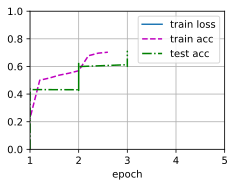

In [ ]:
batch_size = 64
train_fine_tuning(finetune_net, 5e-5, batch_size=batch_size)

In [ ]:
batch_size = 128
train_fine_tuning(finetune_net, 5e-5, batch_size=batch_size)